In [ ]:
from matplotlib import pyplot as plt
import numpy as np

## Opening and sorting data

In [52]:
path1 = r"Z:\gGermain\1_1500_av.csv"
path2 = r"Z:\gGermain\1501_end_av.csv"
data1 = np.loadtxt(path1, skiprows=1, delimiter=',')
data2 = np.loadtxt(path2, skiprows=1, delimiter=',')
data = np.concatenate((data1[1:, 1], data2[:, 1]))  # on skip le tout premier frame, noir

FPS = 40
nChannels = 4
endTime = (1/FPS) * data.shape[0]
timestamp = np.linspace(0, int(endTime), int(data.shape[0]/nChannels))


violet = data[0::4]
blue   = data[1::4]
green  = data[2::4]
red    = data[3::4]

violet[0:5] = np.mean(violet[5:])


## Plotting raw data

Text(0, 0.5, 'normalized intensity signal (-)')

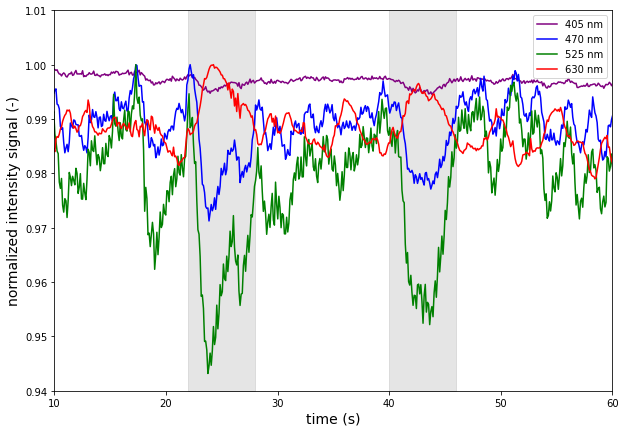

In [71]:

fig = plt.figure(figsize=(10,7))
plt.plot(timestamp, violet/np.max(violet), color='purple', label='405 nm')
plt.plot(timestamp, blue/np.max(blue), color='blue', label='470 nm')
plt.plot(timestamp, green/np.max(green), color='green', label='525 nm')
plt.plot(timestamp, red/np.max(red), color='red', label='630 nm')
plt.fill_between((22, 28), (0.94, 0.94), (1.01, 1.01), color='gray', alpha=0.2)
plt.fill_between((40, 46), (0.94, 0.94), (1.01, 1.01), color='gray', alpha=0.2)
plt.ylim(0.94, 1.01)
plt.xlim(10, 60)
plt.legend()
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("normalized intensity signal (-)", fontsize=14)


## Comparaison bleu et vert

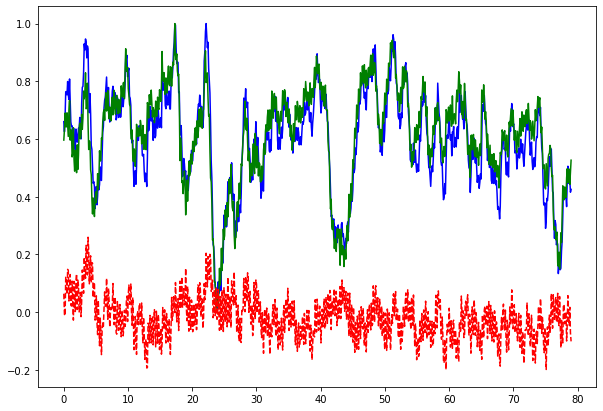

In [64]:
mod_blue = (blue - np.min(blue))/np.max(blue - np.min(blue))
mod_green = (green - np.min(green))/np.max(green - np.min(green))

fig = plt.figure(figsize=(10, 7))
plt.plot(timestamp, mod_blue, color='blue', label='470 nm')
plt.plot(timestamp, mod_green, color='green', label='525 nm')
plt.plot(timestamp, mod_blue - mod_green, 'r--')
